In [71]:
from pandas import read_csv


dataframe = read_csv('titanic.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. How many records ?
There are 891 records and 12 features

In [72]:
print(len(dataframe['Age'].unique()))

89


2. How many different values for Age ?
There are 89 different values

{'whiskers': [<matplotlib.lines.Line2D at 0x17cf7103bc0>,
 'caps': [<matplotlib.lines.Line2D at 0x17cf71025a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cf7102f90>],
 'medians': [<matplotlib.lines.Line2D at 0x17cf7102510>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cf7100f50>],
 'means': []}

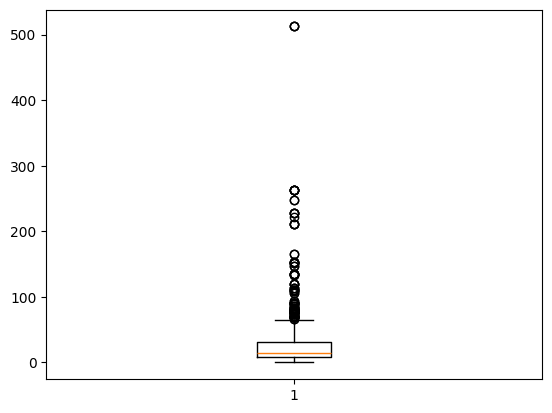

In [73]:
from matplotlib.pyplot import boxplot


boxplot(dataframe['Fare'])


<Axes: >

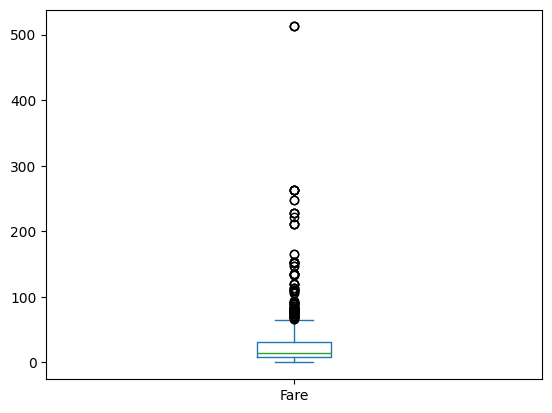

In [74]:
dataframe['Fare'].plot(kind='box')

In [75]:
dataframe_order_age = dataframe.sort_values('Age', ignore_index=True)
print(dataframe_order_age.head(15))

    PassengerId  Survived  Pclass                             Name     Sex  \
0           804         1       3  Thomas, Master. Assad Alexander    male   
1           756         1       2        Hamalainen, Master. Viljo    male   
2           470         1       3    Baclini, Miss. Helene Barbara  female   
3           645         1       3           Baclini, Miss. Eugenie  female   
4            79         1       2    Caldwell, Master. Alden Gates    male   
5           832         1       2  Richards, Master. George Sibley    male   
6           306         1       1   Allison, Master. Hudson Trevor    male   
7           165         0       3     Panula, Master. Eino Viljami    male   
8           184         1       2        Becker, Master. Richard F    male   
9           173         1       3     Johnson, Miss. Eleanor Ileen  female   
10          382         1       3      Nakid, Miss. Maria ("Mary")  female   
11          789         1       3       Dean, Master. Bertram Ve

In [76]:
print(dataframe['Sex'].unique())
dataframe_male = dataframe[dataframe['Sex']=='male']
print(dataframe_male['Age'].mean())

['male' 'female']
30.72664459161148


In [77]:
print(len(dataframe[dataframe['Age']>= 70]))

7


In [78]:
print(dataframe[(dataframe['Age'] >= 30) & (dataframe['Age'] <= 40)])

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
4              5         0       3   
13            14         0       3   
18            19         0       3   
..           ...       ...     ...   
867          868         0       1   
872          873         0       1   
881          882         0       3   
885          886         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
..                                                 ...     ...   ... 

In [79]:
dataframe['Surname'] = dataframe['Name'].apply(lambda x : x.split(',')[0])
dataframe['Title'] = dataframe['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
dataframe['First_name'] = dataframe['Name'].apply(lambda x : x.split(',')[1].split('.')[1].strip())
print(dataframe['Title'].value_counts())
print(dataframe[['Surname', 'First_name', 'Name']])

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
       Surname                             First_name  \
0       Braund                            Owen Harris   
1      Cumings  John Bradley (Florence Briggs Thayer)   
2    Heikkinen                                  Laina   
3     Futrelle          Jacques Heath (Lily May Peel)   
4        Allen                          William Henry   
..         ...                                    ...   
886   Montvila                                 Juozas   
887     Graham                         Margaret Edith   
888   Johnston               Catherine Helen "Carrie"   
889       Behr                            Karl Howell   
8

In [80]:
print(dataframe[dataframe['Surname'].str.startswith('Williams')])

     PassengerId  Survived  Pclass                                    Name  \
17            18         1       2            Williams, Mr. Charles Eugene   
155          156         0       1             Williams, Mr. Charles Duane   
304          305         0       3       Williams, Mr. Howard Hugh "Harry"   
351          352         0       1  Williams-Lambert, Mr. Fletcher Fellows   
735          736         0       3                    Williams, Mr. Leslie   

      Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  \
17   male   NaN      0      0    244373  13.0000   NaN        S   
155  male  51.0      0      1  PC 17597  61.3792   NaN        C   
304  male   NaN      0      0  A/5 2466   8.0500   NaN        S   
351  male   NaN      0      0    113510  35.0000  C128        S   
735  male  28.5      0      0     54636  16.1000   NaN        S   

              Surname Title           First_name  
17           Williams    Mr       Charles Eugene  
155          Williams    M

In [85]:
print(dataframe.groupby('Sex')['Age'].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [ ]:
dataframe['Is_under_25'] = dataframe['Age'] < 25
print(dataframe.groupby('Is_under_25')['Survived'].mean())

Is_under_25
False    0.365416
True     0.424460
Name: Survived, dtype: float64


In [96]:
dataframe.groupby(dataframe['Age'] < 25)['Survived'].mean()

Age
False    0.365416
True     0.424460
Name: Survived, dtype: float64

In [95]:
from pandas import pivot_table


pivot_t = pivot_table(dataframe, values='Survived', columns=['Pclass', 'Sex'], aggfunc='mean')
print(pivot_t)

Pclass           1                   2                3          
Sex         female      male    female      male female      male
Survived  0.968085  0.368852  0.921053  0.157407    0.5  0.135447
